In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

/tmp/ipykernel_12107/3167992752.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data 01

In [61]:
# Read the CSV file
data_read = pd.read_csv('data03.csv')
data = data_read.copy(deep=True)

In [62]:
# Numbers and names
num_samples = len(data)
num_features = len(data.columns)
feature_names = data.columns.tolist()
features_labels = [feature for feature in feature_names if ':' not in feature]

# Select feature names that match the MAC address pattern
mac_address_pattern = r'[0-9A-Fa-f]{2}[:][0-9A-Fa-f]{2}'


features_mac = [feature for feature in data.columns if re.search(mac_address_pattern, feature)]

In [63]:
# Print the results
print("Number of samples:", num_samples)
print("Number of features:", num_features)
#print("Feature names:", np.sort(feature_names)[::-1])
print("Label features names :", features_labels)

Number of samples: 25223
Number of features: 615
Label features names : ['timestamp', 'room', 'device_id', 'door_status', 'room_part']


/tmp/ipykernel_12107/3345636707.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  means_per_mac_sorted = means_per_mac[args]
/tmp/ipykernel_12107/3345636707.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_per_mac_sorted = max_per_mac[args]
/tmp/ipykernel_12107/3345636707.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_per_mac_sorted = np.min(selected_data, axis = 0)[args]


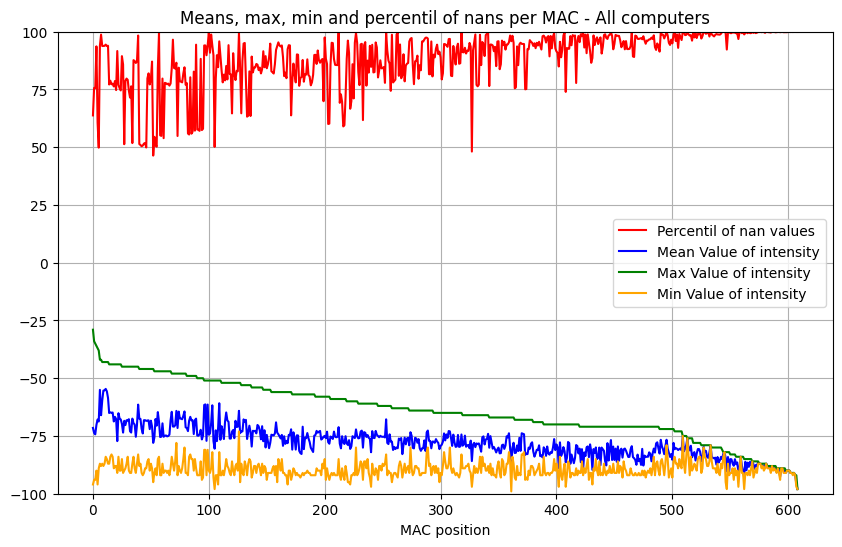

In [64]:
# ALL COMPUTERS
selected_data = data[features_mac]
means_per_mac = np.mean(selected_data, axis = 0)
max_per_mac = np.max(selected_data, axis = 0)
args = np.argsort(max_per_mac)[::-1]
means_per_mac_sorted = means_per_mac[args]
max_per_mac_sorted = max_per_mac[args]
min_per_mac_sorted = np.min(selected_data, axis = 0)[args]

nan_percentages_per_mac = (np.array(selected_data.isna().sum(axis=0))[args] / num_samples) * 100

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(range(len(means_per_mac_sorted)), nan_percentages_per_mac, color='red')
plt.plot(range(len(means_per_mac_sorted)), means_per_mac_sorted, color='blue')
plt.plot(range(len(means_per_mac_sorted)), max_per_mac_sorted, color='green')
plot = plt.plot(range(len(means_per_mac_sorted)), min_per_mac_sorted, color='orange')
plt.xlabel('MAC position')
plt.ylim(bottom=-100, top=100)
plt.legend(["Percentil of nan values", "Mean Value of intensity", "Max Value of intensity", "Min Value of intensity"])
plt.title('Means, max, min and percentil of nans per MAC - All computers')
plt.grid(True, which="both")
plt.show()

In [ ]:
# Vitor
selected_data = data[data["device_id"] == "V"][features_mac]
nan_mask = np.array(selected_data.isna().all(axis=0))
selected_data = selected_data[np.logical_not(nan_mask)]
cleaned_args = np.argsort(max_per_mac[np.logical_not(nan_mask)])[::-1]

means_per_mac2 = np.mean(selected_data, axis = 0)
max_per_mac2 = np.max(selected_data, axis = 0)
means_per_mac_sorted2 = means_per_mac[cleaned_args]
max_per_mac_sorted2 = max_per_mac[cleaned_args]
min_per_mac_sorted2 = np.min(selected_data, axis = 0)[cleaned_args]
nan_percentages_per_mac2 = (np.array(selected_data.isna().sum(axis=0))[cleaned_args] / len(selected_data)) * 100

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(range(len(means_per_mac_sorted2)), nan_percentages_per_mac2, color='red')
plt.plot(range(len(means_per_mac_sorted2)), means_per_mac_sorted2, color='blue')
plt.plot(range(len(means_per_mac_sorted2)), max_per_mac_sorted2, color='green')
plt.plot(range(len(means_per_mac_sorted2)), min_per_mac_sorted2, color='orange')
plt.xlabel('MAC position')
plt.ylim(bottom=-100, top=100)
plt.legend(["Percentil of nan values", "Mean Value of intensity", "Max Value of intensity", "Min Value of intensity"])
plt.title('Means, max, min and percentil of nans per MAC - V device')
plt.grid(True, which="both")
plt.show()


/tmp/ipykernel_12107/2156609187.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_data = data[data["room"] == "LC410"][data["room_part"] != 5][features_mac].dropna(axis=1, how='all')
/tmp/ipykernel_12107/2156609187.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  means_per_mac_sorted = means_per_mac[args]


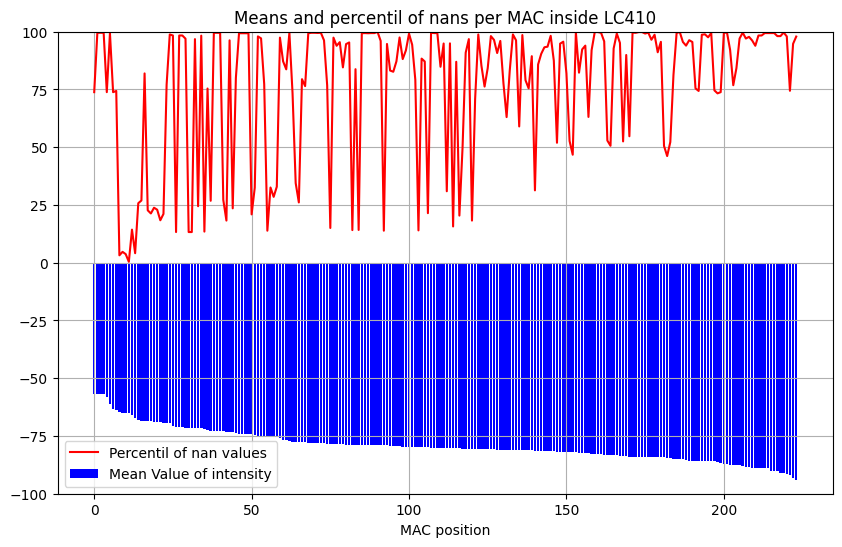

In [ ]:
# inside room LC410
selected_data = data[data["room"] == "LC410"][data["room_part"] != 5][features_mac].dropna(axis=1, how='all')

means_per_mac = np.mean(selected_data, axis = 0)
args = np.argsort(means_per_mac)[::-1]
means_per_mac_sorted = means_per_mac[args]

nan_percentages_per_mac = (np.array(selected_data.isna().sum(axis=0))[args] / selected_data.shape[0]) * 100

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(range(len(means_per_mac_sorted)), means_per_mac_sorted, color='blue')
plt.plot(range(len(means_per_mac_sorted)), nan_percentages_per_mac, color='red')
plt.xlabel('MAC position')
plt.ylim(bottom=-100, top=100)
plt.legend(["Percentil of nan values", "Mean Value of intensity"])
plt.title('Means and percentil of nans per MAC inside LC410')
plt.grid(True, which="both")
plt.show()

In [ ]:
print("Minimal intensity: ", np.min(data[features_mac]))
# Replace NaN values with -105
data_virgin = data
data = data.fillna(-100)

Minimal intensity:  -99.0


Max values : [-29. -36. -30. -34.]


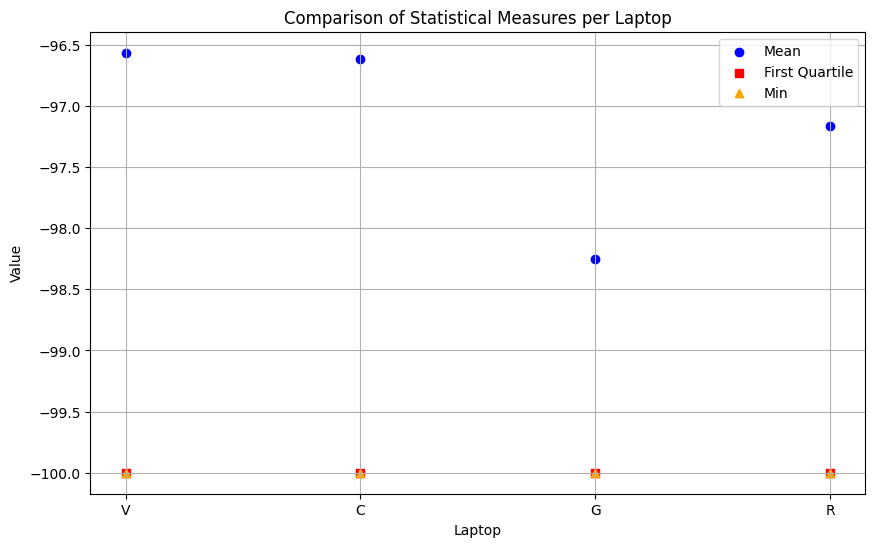

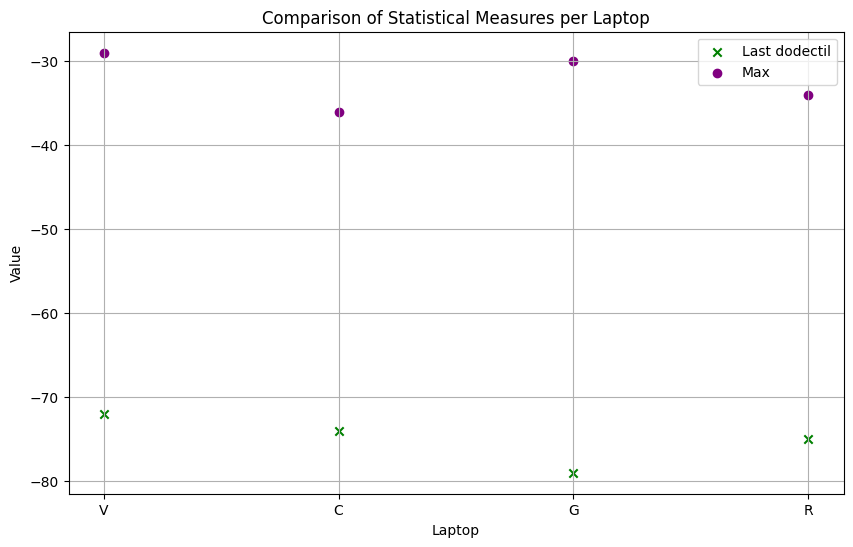

In [ ]:
means_per_laptop = np.zeros(4)
first_quartile_per_laptop = np.zeros(4)
last_sextil_per_laptop = np.zeros(4)
min_per_laptop = np.zeros(4)
max_per_laptop = np.zeros(4)

laptops = data["device_id"].unique()
i = 0
for lap in data["device_id"].unique():
    analisable_data = data[data["device_id"] == lap][features_mac]
    means_per_laptop[i] = np.mean(analisable_data)
    first_quartile_per_laptop[i] = np.percentile(analisable_data, 25)
    last_sextil_per_laptop[i] = np.percentile(analisable_data, 95)
    min_per_laptop[i] = np.min(analisable_data)
    max_per_laptop[i] = np.max(analisable_data)
    i+=1
    
# Plotting
plt.figure(1, figsize=(10, 6))
plt.scatter(laptops, means_per_laptop, label='Mean', marker='o', color='blue')
plt.scatter(laptops, first_quartile_per_laptop, label='First Quartile', marker='s', color='red')
plt.scatter(laptops, min_per_laptop, label='Min', marker='^', color='orange')

plt.xlabel('Laptop')
plt.ylabel('Value')
plt.grid(True)
plt.title('Comparison of Statistical Measures per Laptop')
plt.legend()

plt.figure(2, figsize=(10, 6))
plt.scatter(laptops, last_sextil_per_laptop, label='Last dodectil', marker='x', color='green')
plt.scatter(laptops, max_per_laptop, label='Max', marker='o', color='purple')

plt.xlabel('Laptop')
plt.ylabel('Value')
#plt.ylim(top=-37)
plt.grid(True)
plt.title('Comparison of Statistical Measures per Laptop')
plt.legend()

print("Max values :", max_per_laptop)
plt.show()

Percentage values : [85.58554358 86.23721965 93.93603068 88.70824807]


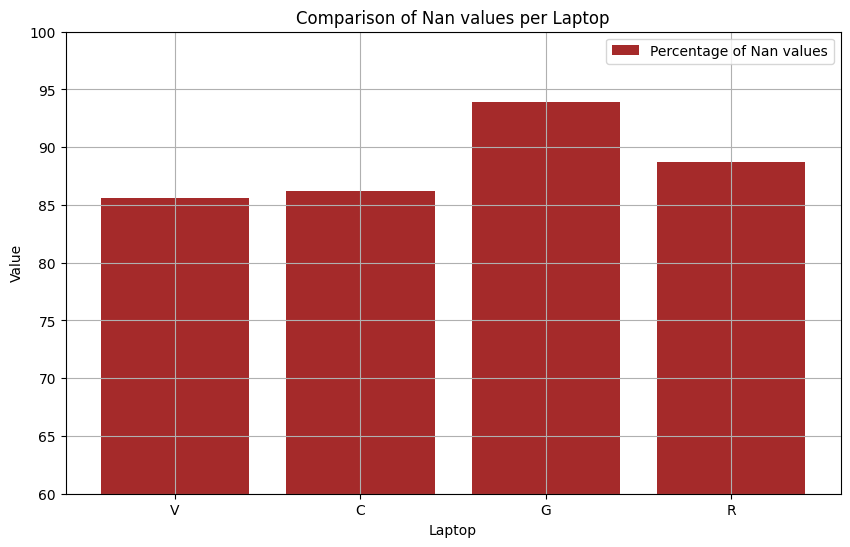

In [ ]:
percentages_per_laptop = np.zeros(4)

laptops = data["device_id"].unique()
i = 0
for lap in data["device_id"].unique():
    analisable_data = data_virgin[data["device_id"] == lap][features_mac]
    percentages_per_laptop[i] = np.sum(np.array(analisable_data.isna())) / (analisable_data.shape[0]*analisable_data.shape[1]) * 100
    i+=1
    
# Plotting the bar graph
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(laptops, percentages_per_laptop, label='Percentage of Nan values', color='brown')

plt.xlabel('Laptop')
plt.ylabel('Value')
plt.grid(True)
plt.ylim(top = 100, bottom = 60)
plt.title('Comparison of Nan values per Laptop')
plt.legend()

print("Percentage values :", percentages_per_laptop)
plt.show()

## Data 02 et 03

In [ ]:
# Read the CSV file
data_read2 = pd.read_csv('data03.csv')
data = data_read2.copy(deep=True)

In [ ]:
# Numbers and names
num_samples = len(data)
num_features = len(data.columns)
feature_names = data.columns.tolist()
features_labels = [feature for feature in feature_names if ':' not in feature]

# Select feature names that match the MAC address pattern
mac_address_pattern = r'[0-9A-Fa-f]{2}[:][0-9A-Fa-f]{2}'
features_mac = [feature for feature in data.columns if re.search(mac_address_pattern, feature)]

In [ ]:
# Print the results
print("Number of samples:", num_samples)
print("Number of features:", num_features)
#print("Feature names:", np.sort(feature_names)[::-1])
print("Label features names :", features_labels)

Number of samples: 25223
Number of features: 615
Label features names : ['timestamp', 'room', 'device_id', 'door_status', 'room_part']


In [ ]:
rooms = np.sort(data["room"].unique())
print("Quantity of rooms: ", len(rooms))
print("Rooms   Devices               Samples per device")
print("------  --------              -------------------")
for room in rooms:
    devices = np.sort(data[data["room"] == room]["device_id"].unique())
    num_devices = len(devices)
    samples_per_device = []
    for dev in devices:
        selected_data = data[data["room"] == room]
        samples_per_device.append(selected_data[selected_data["device_id"] == dev].shape[0])
    print(f"{room:<7} {str(devices):<17} ({num_devices}) {samples_per_device}")


Quantity of rooms:  14
Rooms   Devices               Samples per device
------  --------              -------------------
LC410   ['C' 'G' 'R' 'V'] (4) [442, 498, 500, 467]
LC412   ['C' 'G' 'R' 'V'] (4) [456, 491, 500, 469]
LC413   ['C' 'G' 'R' 'V'] (4) [500, 500, 500, 500]
LC414   ['C' 'G' 'R' 'V'] (4) [451, 481, 500, 474]
LC415   ['C' 'G' 'R' 'V'] (4) [452, 493, 500, 480]
LC416   ['C' 'G' 'R' 'V'] (4) [455, 497, 500, 477]
LC417   ['C' 'G' 'R' 'V'] (4) [500, 100, 500, 500]
LC424   ['C' 'G' 'R' 'V'] (4) [500, 500, 500, 500]
LC426   ['C' 'G' 'R' 'V'] (4) [500, 500, 500, 500]
LC437   ['G' 'V']         (2) [500, 500]
LC442   ['C' 'G' 'R' 'V'] (4) [540, 500, 500, 500]
LC443   ['G' 'R' 'V']     (3) [500, 500, 500]
LC448   ['C' 'G' 'R' 'V'] (4) [500, 500, 500, 500]
LC455   ['G' 'R' 'V']     (3) [500, 500, 500]


In [ ]:
# Filter data for device_id == 'G' and room is either 'LC410' or 'LC412'
filtered_data = data[(data['device_id'] == 'C') & (data['room'].isin(['LC442']))]

# Count the number of samples per room_part
samples_per_room_part = filtered_data['room_part'].value_counts().sort_index()
print(samples_per_room_part)
# Count the number of samples per door_status
samples_per_door = filtered_data['door_status'].value_counts().sort_index()
print(samples_per_door)


room_part
1    120
2    120
3    100
4    100
5    100
Name: count, dtype: int64
door_status
0    290
1    250
Name: count, dtype: int64
